In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import clone
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, mean_squared_error, mean_absolute_error

sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (15,5)

In [2]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\KIBV\\kindey stone urine analysis.csv')
dataset.head(5)

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [3]:
dataset.shape

(79, 7)

In [4]:
dataset.dtypes

gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object

In [6]:
dataset.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [7]:
dataset.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  79 non-null     float64
 1   ph       79 non-null     float64
 2   osmo     79 non-null     int64  
 3   cond     79 non-null     float64
 4   urea     79 non-null     int64  
 5   calc     79 non-null     float64
 6   target   79 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 4.4 KB


In [9]:
dataset.corr()

,gravity,ph,osmo,cond,urea,calc,target
gravity,1.000000,-0.253340,0.861466,0.559064,0.823477,0.525699,0.419818
ph,-0.253340,1.000000,-0.238841,-0.097680,-0.275557,-0.119488,-0.112191
osmo,0.861466,-0.238841,1.000000,0.812780,0.871178,0.522979,0.231834
cond,0.559064,-0.097680,0.812780,1.000000,0.495405,0.351030,0.059717
urea,0.823477,-0.275557,0.871178,0.495405,1.000000,0.502327,0.258402
calc,0.525699,-0.119488,0.522979,0.351030,0.502327,1.000000,0.537728
target,0.419818,-0.112191,0.231834,0.059717,0.258402,0.537728,1.000000


<AxesSubplot:>

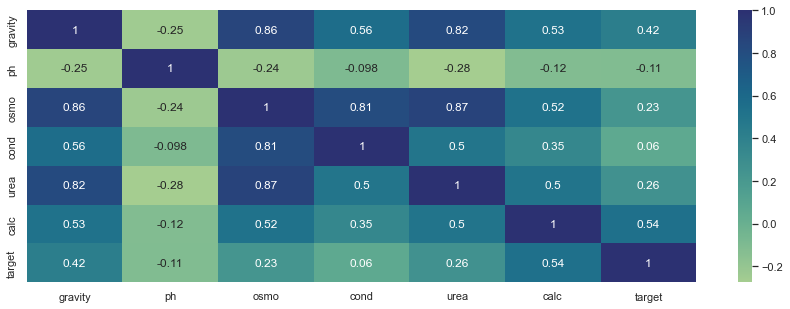

In [10]:
sns.heatmap(dataset.corr(),annot=True,cmap='crest')

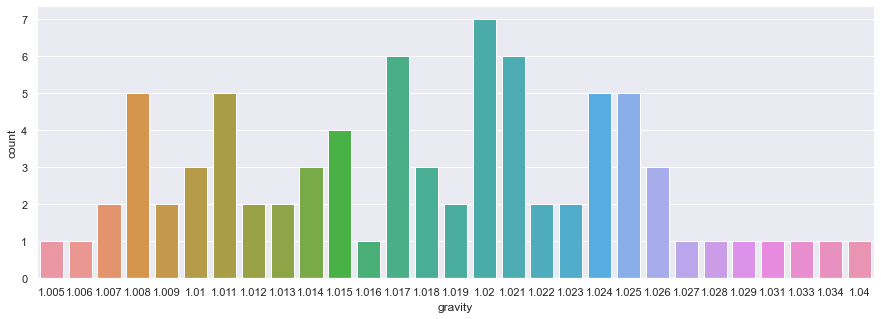

In [13]:
sns.countplot(
  x='gravity',
  data=dataset
);

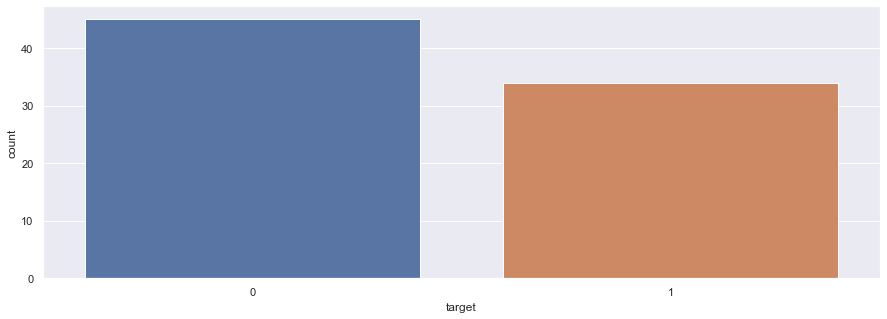

In [14]:
sns.countplot(
  x='target',
  data=dataset
);

In [15]:
cols = dataset.columns

In [26]:
#put the values in the same scale.
scaler = MinMaxScaler()
X = scaler.fit_transform(dataset)
X = pd.DataFrame(X, columns = cols)
y = dataset['gravity']

In [27]:
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(X, y, test_size = 0.2)
rf = RandomForestRegressor()
rf.fit(X_train_feat, y_train_feat)

RandomForestRegressor()

In [28]:
def imp_dataset(column_names, importances):
  dataset = pd.DataFrame({'feature': column_names,
                     'feature_importance': importances}).sort_values('feature_importance', ascending = False).reset_index(drop = True)
  return dataset

In [29]:
def drop_col_feat_imp(model, X_train_feat, y_train_feat, random_state = 42):
    
    # clone the model to have the exact same specification as the one initially trained
    model_clone = clone(model)
    # set random_state for comparability
    model_clone.random_state = random_state
    # training and scoring the benchmark model
    model_clone.fit(X_train_feat, y_train_feat)
    benchmark_score = model_clone.score(X_train_feat, y_train_feat)
    # list for storing feature importances
    importances = []
       # iterating over all columns and storing feature importance (difference between benchmark and new model)
    for col in X_train_feat.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train_feat.drop(col, axis = 1), y_train_feat)
        drop_col_score = model_clone.score(X_train_feat.drop(col, axis = 1), y_train_feat)
        importances.append(benchmark_score - drop_col_score)
    
    importances_dataset = imp_dataset(X_train_feat.columns, importances)
    return importances_dataset

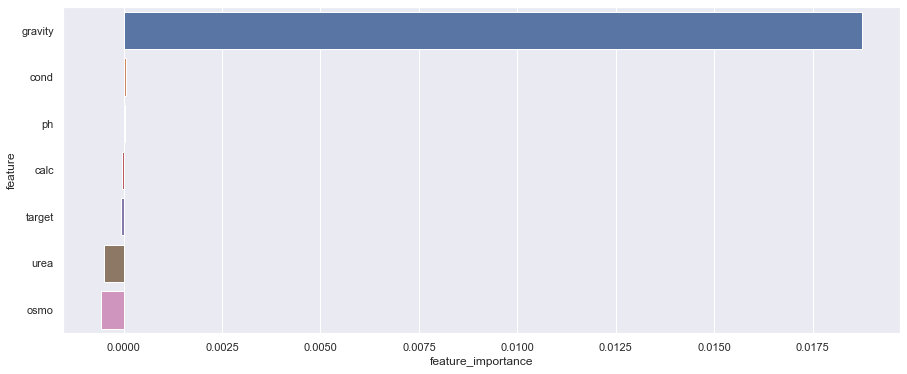

In [30]:
feat = drop_col_feat_imp(rf, X_train_feat, y_train_feat)
plt.figure(figsize=(15,6))
sns.barplot(data=feat, y='feature', x='feature_importance');

In [32]:
preds = rf.predict(X_test_feat)
preds

array([1.01702, 1.00813, 1.01047, 1.01147, 1.02652, 1.02828, 1.01783,
       1.02868, 1.01151, 1.02181, 1.01221, 1.02009, 1.02116, 1.01429,
       1.02514, 1.02096])

In [37]:
X = dataset.drop(columns='target',axis=1)
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
from sklearn.metrics import accuracy_score
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(X_train, y_train)
preds = xgb_cl.predict(X_test)

In [38]:
print('XGBoost : \n', classification_report(y_test, preds))
print('XGBoost Accuracy: ', accuracy_score(y_test, preds))

XGBoost : 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.62      0.62      0.62         8

    accuracy                           0.70        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.70      0.70      0.70        20

XGBoost Accuracy:  0.7


In [39]:
print('MAE:', mean_absolute_error(y_test, preds))
print('MSE:', mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))

MAE: 0.3
MSE: 0.3
RMSE: 0.5477225575051661
